### Import libraries

In [32]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import plotly.graph_objects as go
import os

### Import data

In [33]:
PATH = '../'
players = pd.read_csv(os.path.join(PATH, 'data/raw_data/players.csv'))
player_appearances = pd.read_csv(os.path.join(PATH, 'data/raw_data/appearances.csv'))
games = pd.read_csv(os.path.join(PATH, 'data/raw_data/games.csv'))
competitions = pd.read_csv(os.path.join(PATH, 'data/raw_data/competitions.csv'))

print(players.size)
print(player_appearances.size)
print(games.size)

701224
20036419
1536883


### Data copy

In [34]:
df_players = players.copy()
df_appearances = player_appearances.copy()
df_games = games.copy()
df_competitions = competitions.copy()

### Data exploring

In [35]:
player_appearances.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [36]:
player_appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541263 entries, 0 to 1541262
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1541263 non-null  object
 1   game_id                 1541263 non-null  int64 
 2   player_id               1541263 non-null  int64 
 3   player_club_id          1541263 non-null  int64 
 4   player_current_club_id  1541263 non-null  int64 
 5   date                    1541263 non-null  object
 6   player_name             1541262 non-null  object
 7   competition_id          1541263 non-null  object
 8   yellow_cards            1541263 non-null  int64 
 9   red_cards               1541263 non-null  int64 
 10  goals                   1541263 non-null  int64 
 11  assists                 1541263 non-null  int64 
 12  minutes_played          1541263 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 152.9+ MB


In [37]:
players_matches = player_appearances.groupby('player_id')[['player_id']].count()
players_matches.columns = ['count']
players_matches.reset_index(inplace=True)
players_matches.head()

,player_id,count
0,10,136
1,26,152
2,65,122
3,77,4
4,80,12


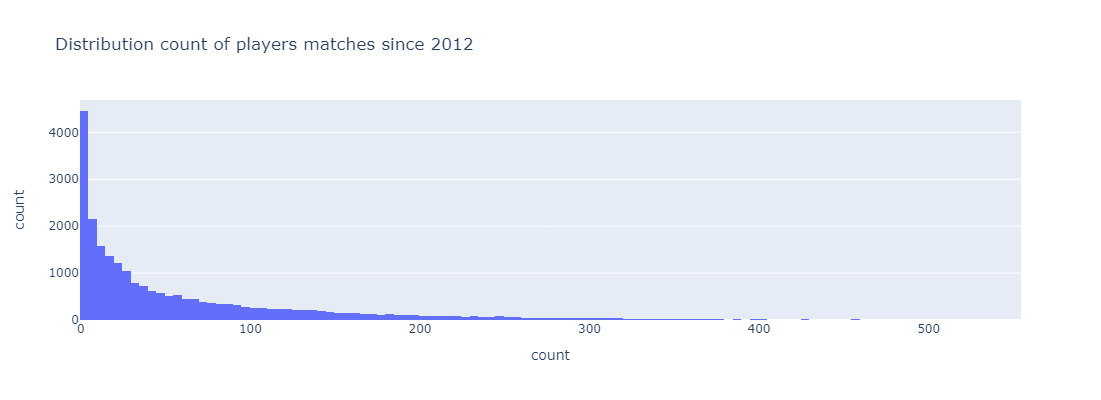

In [38]:
px.histogram(players_matches, x='count', title='Distribution count of players matches since 2012', width=600, height=400)

In [39]:
competitions_matches = player_appearances.groupby(by=['game_id','competition_id'])[['competition_id']].count()
competitions_matches.columns=['count']
competitions_matches.reset_index(drop=False, inplace=True)
competitions_matches = competitions_matches.groupby(by=['competition_id'])[['competition_id']].count()
competitions_matches.columns = ['count']
competitions_matches.reset_index(inplace=True)
competitions_matches.sort_values(by='count', ascending=False, inplace=True)
competitions_matches.reset_index(drop=True, inplace=True)
competitions_matches.head()

,competition_id,count
0,IT1,4439
1,GB1,4438
2,ES1,4390
3,FR1,4285
4,TR1,3831


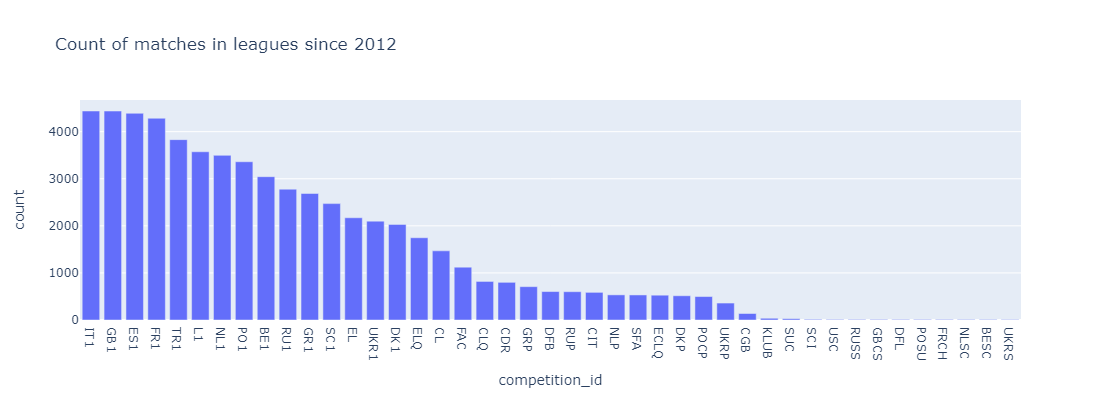

In [40]:
px.bar(competitions_matches, x='competition_id', y='count', title='Count of matches in leagues since 2012', height=400, width=800)

In [41]:
competitions_goals = player_appearances.groupby(by=['competition_id'])[['goals']].sum()
competitions_goals.columns = ['goals']
competitions_goals.reset_index(inplace=True)
competitions_goals.sort_values(by='goals', ascending=False, inplace=True)
competitions_goals.reset_index(drop=True, inplace=True)
competitions_goals.head()

,competition_id,goals
0,IT1,11845
1,GB1,11839
2,ES1,11137
3,FR1,10822
4,L1,10445


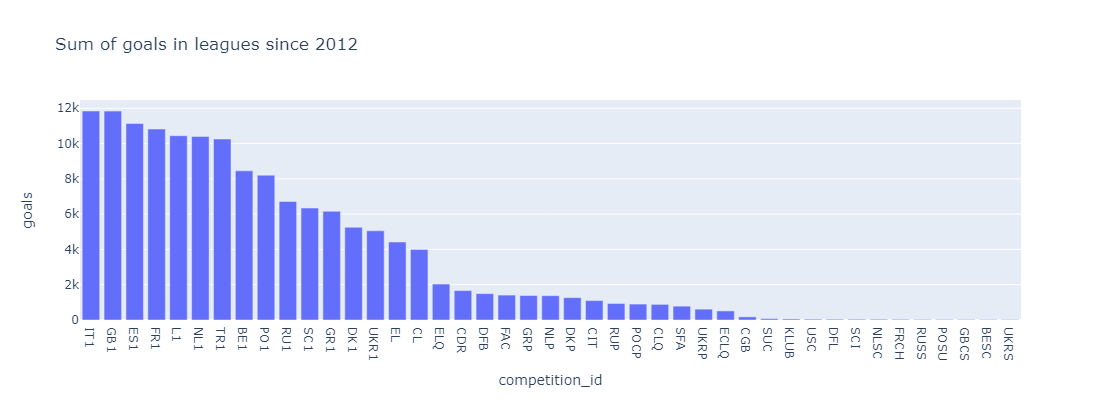

In [42]:
px.bar(competitions_goals, x='competition_id', y='goals', title='Sum of goals in leagues since 2012', height=400, width=800)

In [43]:
competitions_goals_mean = player_appearances.groupby(by=['game_id','competition_id'])[['goals']].sum()
competitions_goals_mean.reset_index(drop=False, inplace=True)
competitions_goals_mean = competitions_goals_mean.groupby(by=['competition_id'])[['goals']].mean()
competitions_goals_mean.columns = ['avg_goals_pg']
competitions_goals_mean.reset_index(drop=False, inplace=True)
competitions_goals_mean.sort_values(by='avg_goals_pg', inplace=True, ascending=False)
competitions_goals_mean.reset_index(drop=True, inplace=True)
competitions_goals_mean.head()

,competition_id,avg_goals_pg
0,USC,3.916667
1,NLSC,3.818182
2,DFL,3.666667
3,SCI,3.000000
4,FRCH,3.000000


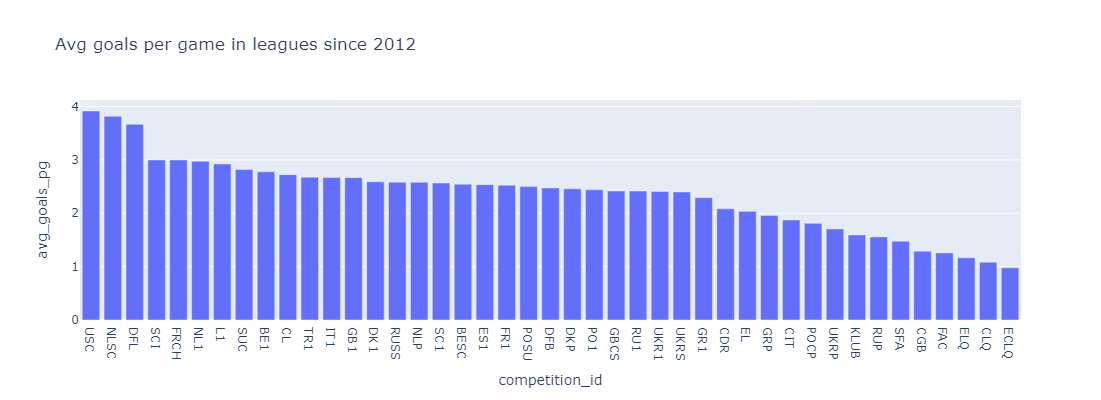

In [44]:
px.bar(competitions_goals_mean, x='competition_id', y='avg_goals_pg', title='Avg goals per game in leagues since 2012', height=400, width=800)

### Data preprocessing

In [45]:
player_appearances['date'] = pd.to_datetime(player_appearances['date'])
df_players_last_game = player_appearances.groupby(by='player_id')[['date']].max()
df_players_last_game.reset_index(inplace=True)
df_players_last_game['last_year'] = df_players_last_game['date'].dt.year
df_players_last_game.drop(columns=['date'], inplace=True)
df_players_last_game.head()

,player_id,last_year
0,10,2016
1,26,2018
2,65,2016
3,77,2012
4,80,2017


In [46]:
tmp = pd.merge(player_appearances, df_players_last_game, on=['player_id'], how='inner')
tmp.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,last_year
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,2014
1,2231980_38004,2231980,38004,853,235,2012-07-10,Aurélien Joachim,CLQ,0,0,2,0,62,2014
2,2244350_38004,2244350,38004,853,235,2012-07-17,Aurélien Joachim,CLQ,0,0,1,0,86,2014
3,2244351_38004,2244351,38004,853,235,2012-07-24,Aurélien Joachim,CLQ,0,0,1,1,90,2014
4,2246629_38004,2246629,38004,853,235,2012-08-01,Aurélien Joachim,CLQ,0,0,1,0,90,2014


In [47]:
tmp['to_end'] = tmp['last_year'] -  tmp['date'].dt.year
tmp.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,last_year,to_end
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,2014,2
1,2231980_38004,2231980,38004,853,235,2012-07-10,Aurélien Joachim,CLQ,0,0,2,0,62,2014,2
2,2244350_38004,2244350,38004,853,235,2012-07-17,Aurélien Joachim,CLQ,0,0,1,0,86,2014,2
3,2244351_38004,2244351,38004,853,235,2012-07-24,Aurélien Joachim,CLQ,0,0,1,1,90,2014,2
4,2246629_38004,2246629,38004,853,235,2012-08-01,Aurélien Joachim,CLQ,0,0,1,0,90,2014,2


In [48]:
tmp = tmp[tmp['to_end'] <= 3]
tmp.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,last_year,to_end
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,2014,2
1,2231980_38004,2231980,38004,853,235,2012-07-10,Aurélien Joachim,CLQ,0,0,2,0,62,2014,2
2,2244350_38004,2244350,38004,853,235,2012-07-17,Aurélien Joachim,CLQ,0,0,1,0,86,2014,2
3,2244351_38004,2244351,38004,853,235,2012-07-24,Aurélien Joachim,CLQ,0,0,1,1,90,2014,2
4,2246629_38004,2246629,38004,853,235,2012-08-01,Aurélien Joachim,CLQ,0,0,1,0,90,2014,2


In [49]:
df_games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league


In [50]:
tmp = pd.merge(tmp, df_games[['game_id', 'season']], on=['game_id'], how='inner')
tmp.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,last_year,to_end,season
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,2014,2,2012
1,2231980_38004,2231980,38004,853,235,2012-07-10,Aurélien Joachim,CLQ,0,0,2,0,62,2014,2,2012
2,2244350_38004,2244350,38004,853,235,2012-07-17,Aurélien Joachim,CLQ,0,0,1,0,86,2014,2,2012
3,2244351_38004,2244351,38004,853,235,2012-07-24,Aurélien Joachim,CLQ,0,0,1,1,90,2014,2,2012
4,2246629_38004,2246629,38004,853,235,2012-08-01,Aurélien Joachim,CLQ,0,0,1,0,90,2014,2,2012


In [51]:
tmp = tmp.groupby(by=['player_id', 'competition_id', 'season'])[['yellow_cards', 'red_cards','goals', 'assists', 'minutes_played']].sum()
tmp.head()

yellow_cards  red_cards  goals  assists  \
player_id competition_id season                                            
10        CIT            2012               1          0      0        0   
                         2014               1          0      3        2   
                         2015               0          0      0        0   
          CLQ            2015               0          0      0        0   
          EL             2012               1          0      0        0   

                                 minutes_played  
player_id competition_id season                  
10        CIT            2012               160  
                         2014               454  
                         2015                82  
          CLQ            2015                45  
          EL             2012                52

In [52]:
tmp.reset_index(drop=False, inplace=True)

In [53]:
tmp

,player_id,competition_id,season,yellow_cards,red_cards,goals,assists,minutes_played
0,10,CIT,2012,1,0,0,0,160
1,10,CIT,2014,1,0,3,2,454
2,10,CIT,2015,0,0,0,0,82
3,10,CLQ,2015,0,0,0,0,45
4,10,EL,2012,1,0,0,0,52
...,...,...,...,...,...,...,...,...
99189,1187799,SC1,2023,1,0,0,0,337
99190,1187799,SFA,2023,0,0,0,0,45
99191,1196380,TR1,2023,0,0,0,0,3
99192,1201294,TR1,2023,0,0,0,0,23


In [54]:
tmp_ = tmp.groupby(by=['player_id', 'competition_id'])[['yellow_cards', 'red_cards','goals','assists', 'minutes_played']].mean()
tmp_.reset_index(inplace=True)
tmp_

,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,10,CIT,0.666667,0.0,1.000000,0.666667,232.000000
1,10,CLQ,0.000000,0.0,0.000000,0.000000,45.000000
2,10,EL,0.333333,0.0,0.666667,0.000000,109.666667
3,10,IT1,2.500000,0.0,8.000000,5.500000,1525.750000
4,10,SCI,0.000000,0.0,0.000000,0.000000,76.000000
...,...,...,...,...,...,...,...
56652,1187799,SC1,1.000000,0.0,0.000000,0.000000,337.000000
56653,1187799,SFA,0.000000,0.0,0.000000,0.000000,45.000000
56654,1196380,TR1,0.000000,0.0,0.000000,0.000000,3.000000
56655,1201294,TR1,0.000000,0.0,0.000000,0.000000,23.000000


In [55]:
df_players_ = df_players[['player_id', 'current_club_domestic_competition_id']]
df_players_.columns = ['player_id', 'competition_id']
tmp = pd.merge(tmp_, df_players_, on=['player_id', 'competition_id'], how='inner')
tmp.head()

,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,10,IT1,2.5,0.0,8.0,5.5,1525.75
1,26,L1,0.0,0.0,0.0,0.0,495.25
2,65,GR1,1.0,1.0,4.0,0.0,705.00
3,77,IT1,0.0,0.0,0.0,0.0,90.00
4,80,L1,0.0,0.0,0.0,0.0,210.00


### Saving data

In [56]:
tmp.to_csv(os.path.join(PATH, 'data/processed/appearances.csv'), index=False)